**Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
print(f'Расчет методом градиентного спуска с intercept \nŷ = b0 + b1 ∗ x')

Расчет методом градиентного спуска с intercept 
ŷ = b0 + b1 ∗ x


In [21]:
def mse_(B0, B1, y=y, x=x, n=10):
    return ((B0 + B1*x - y)**2).sum() / n
alpha = 1e-5
b0 = 1
b1 = 1
n=10
for i in range(3000000):
    b0 -= alpha * (2/n) * np.sum(b0 + b1*x - y)
    b1 -= alpha * (2/n) * np.sum((b0 + b1*x - y)*x)
    if i%500000 == 0:
        print(f'Iteration = {i}, b0 = {b0}, b1 = {b1}, mse = {mse_(b0, b1)}')

Iteration = 0, b0 = 1.01215, b1 = 2.3452493598000004, mse = 228651.2096033184
Iteration = 500000, b0 = 409.107994278479, b1 = 2.878663590048586, mse = 6782.386584565905
Iteration = 1000000, b0 = 441.40202104473354, b1 = 2.6409664808413247, mse = 6472.368052982428
Iteration = 1500000, b0 = 443.95772141437726, b1 = 2.6221554916060335, mse = 6470.426437954922
Iteration = 2000000, b0 = 444.159975671081, b1 = 2.6206668184067663, mse = 6470.414277814376
Iteration = 2500000, b0 = 444.1759817666486, b1 = 2.6205490070643265, mse = 6470.41420165663


In [22]:
y_pred = b0 + b1 * x
print(f'Уравнение линейной регрессии: ŷ = {round(b0, 2)} + {round(b1, 2)} * x')

Уравнение линейной регрессии: ŷ = 444.18 + 2.62 * x


In [23]:
print(f'Функция потерь: mse = {round(mse_(b0, b1), 2)}')

Функция потерь: mse = 6470.41


Уравнение линейной регрессии с intercept: ŷ = 444.18 + 2.62 * x


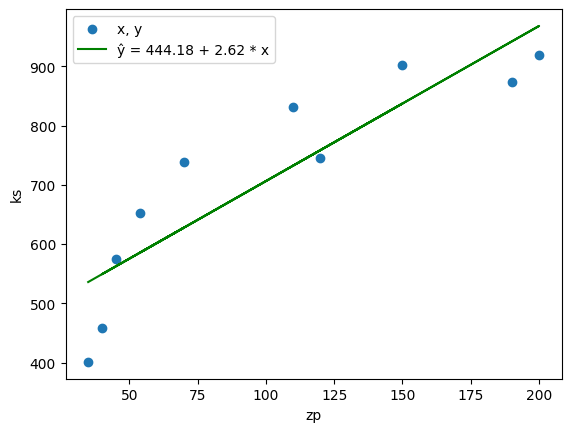

In [24]:
plt.scatter(x, y, label = 'x, y')
plt.plot(x, y_pred, 'g', label = 'ŷ = 444.18 + 2.62 * x')
plt.xlabel('zp')
plt.ylabel('ks')
plt.legend()
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

x = x.reshape(-1, 1)

model = LinearRegression()
regres = model.fit(x, y)
b0 = regres.intercept_
b1 = regres.coef_[0]
y_pred = model.predict(x)
print(f'Уравнение линейной регрессии с intercept: ŷ = {round(b0, 2)} + {round(b1, 2)} * x')

In [25]:
model_1 = LinearRegression(fit_intercept=False)
regres = model_1.fit(x, y)
b1 = regres.coef_[0]
y_pred_1 = model_1.predict(x)
print(f'Уравнение линейной регрессии без intercept: ŷ = {round(b1, 2)} * x')

Уравнение линейной регрессии без intercept: ŷ = 5.89 * x


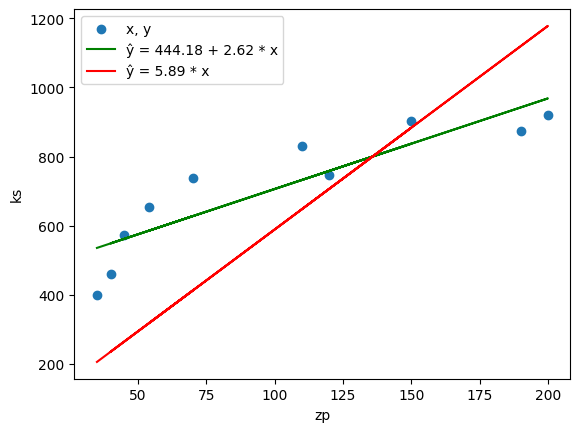

In [26]:
plt.scatter(x, y, label = 'x, y')
plt.plot(x, y_pred, 'g', label = 'ŷ = 444.18 + 2.62 * x')
plt.plot(x, y_pred_1, 'r', label = 'ŷ = 5.89 * x')
plt.xlabel('zp')
plt.ylabel('ks')
plt.legend()